In [1]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
import pandas as pd
import numpy as np
import mplcyberpunk
import matplotlib.pyplot as plt

# Set the styling for our plot later on
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'

In [2]:
# Load the data
df = pd.read_csv("./pollution_data.csv")
df["date"] = pd.to_datetime(df["date"])

# Get the month and year
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Get the only columns we care about
df = df[["year", "month", "pollution"]]
# Group by year and month
data = df.groupby(["year", "month"])["pollution"].mean().reset_index()
# Create a period column that is a Year-Month timeseries
# Period
# 0     2010-01
# 1     2010-02
# 2     2010-03
# 3     2010-04
# 4     2010-05
# 5     2010-06
# 6     2010-07
# 7     2010-08
# 8     2010-09
# . . . . 
data["period"] = pd.to_datetime(
        data.apply(lambda x: f"{int(x.year)}-{int(x.month)}", axis=1)
    ).dt.to_period("M")

# Set the index of our dataframe to be this timeseries rather than a number
data.index = data["period"]

# Drop the columns we don't need.
# We only need the Year-Month timeseries and the value we want to look at
data = data.drop(columns=["period", "year", "month"])
data.head()

,pollution
period,
2010-01,82.026389
2010-02,97.089286
2010-03,89.673387
2010-04,79.806944
2010-05,86.081989


In [8]:
# Get our train and test data
train, test = temporal_train_test_split(data, train_size=0.95)
# Create our forecaster (model)
# sp tells the model how to split the data over the year.
# year / 12 = months
forecaster = ThetaForecaster(sp=12)
# Train the forecaster on our training data
forecaster.fit(train)

ThetaForecaster(sp=12)

In [11]:
# Create a timeseries to represent the range we want to predict
future_timeseries = pd.period_range(start="2015-01-01", end="2016-01-01", freq="M")
# Create a forecast horizon based on this range
forecast_horizon = ForecastingHorizon(values=future_timeseries, is_relative=False)
# Using the forecast horizon range we created, predict the values
pred = forecaster.predict(forecast_horizon)

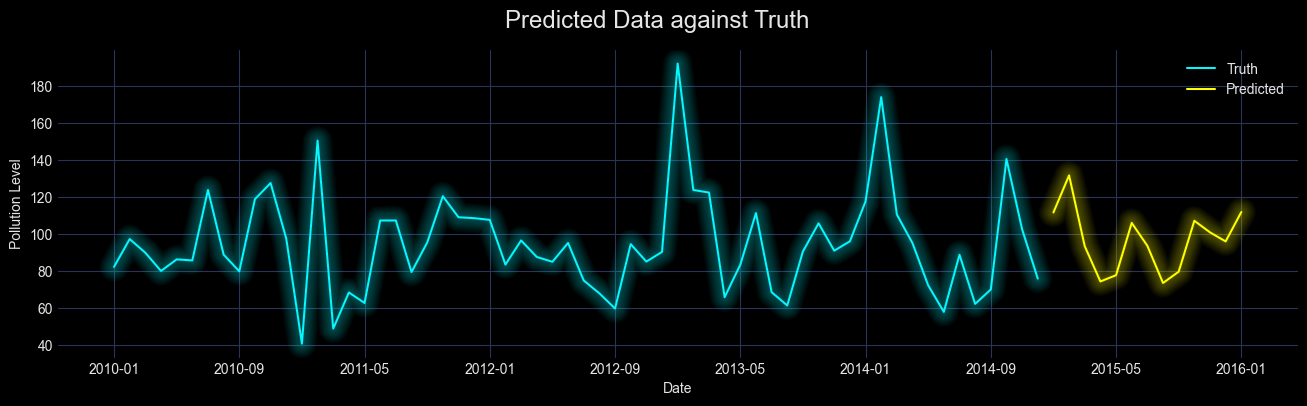

In [12]:
# Plot the orginal data and predicitons
figure = plot_series(
    data,
    pred,
    title="Predicted Data against Truth",
    x_label="Date",
    y_label="Pollution Level",
    labels=["Truth", "Predicted"],
    colors=["C0", "yellow"],
    markers=[None, None]
)[0]

# Make the chart Neon (not needed)
mplcyberpunk.make_lines_glow(
    ax=figure.axes[0],
    n_glow_lines=20,
    diff_linewidth=1.01,
    alpha_line=0.4
)